In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [101]:
ds = pd.read_csv("cleaned_data.csv")

In [102]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  709 non-null    int64  
 1   name        709 non-null    object 
 2   company     709 non-null    object 
 3   year        709 non-null    int64  
 4   Price       709 non-null    float64
 5   kms_driven  709 non-null    float64
 6   fuel_type   709 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 38.9+ KB


In [103]:
ds.describe()


,Unnamed: 0,year,Price,kms_driven
count,709.000000,709.000000,7.090000e+02,709.000000
mean,354.000000,2012.275035,4.000605e+05,47778.844852
std,204.814957,4.071634,4.829231e+05,34258.606415
min,0.000000,1995.000000,3.000000e+04,1000.000000
25%,177.000000,2010.000000,1.650000e+05,29000.000000
50%,354.000000,2013.000000,2.850000e+05,42000.000000
75%,531.000000,2015.000000,4.850000e+05,59910.000000
max,708.000000,2019.000000,8.500003e+06,400000.000000


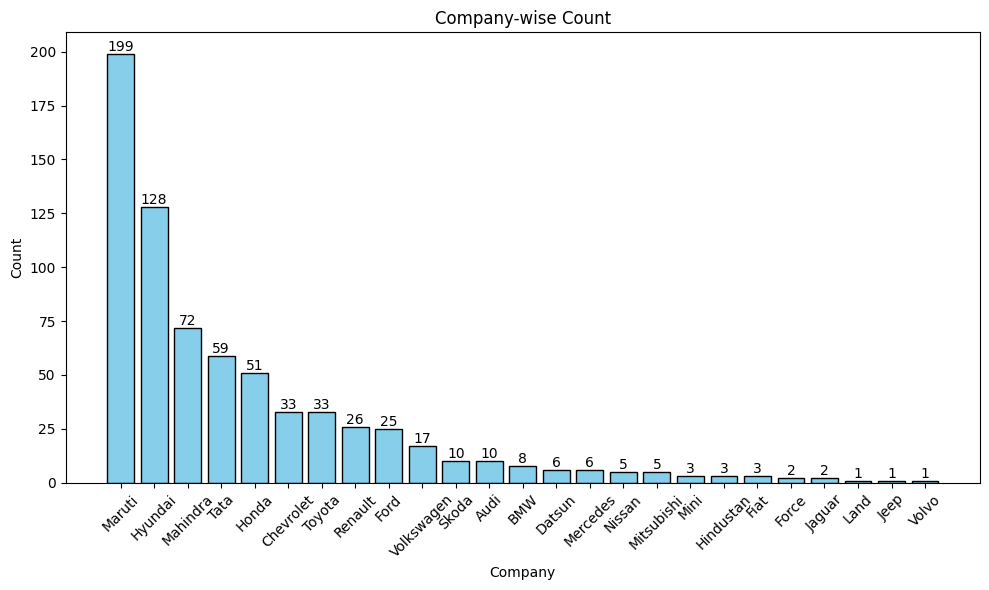

In [104]:
#Companywise Count of Cars
# Assuming ds is your DataFrame and it has a column named 'company'
companywise_count = ds["company"].value_counts()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(companywise_count.index, companywise_count.values, color='skyblue', edgecolor='black')

# Add labels on top of each bar
ax.bar_label(bars)

# Add titles and labels
plt.title("Company-wise Count")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

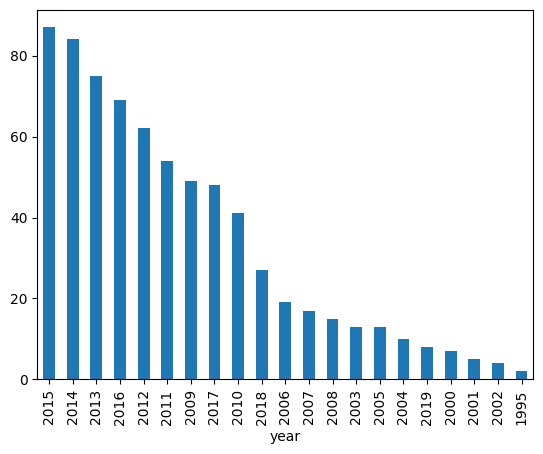

In [105]:
#yearwise Count of Cars
yearwise_counts = ds["year"].value_counts()
yearwise_counts.plot(kind = 'bar')
plt.show()

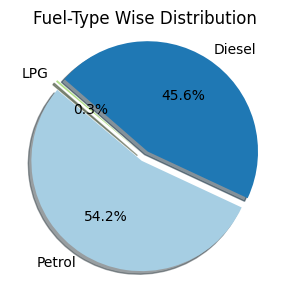

In [106]:
#Fuel-type wise counts

# Assuming ds is your DataFrame and it has a 'fuel_type' column
fueltype_counts = ds["fuel_type"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(3, 3))
colors = plt.cm.Paired.colors  # You can choose other colormaps as well
explode = [0.05] * len(fueltype_counts)  # Slightly explode all slices for visibility

plt.pie(
    fueltype_counts,
    labels=fueltype_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

plt.title("Fuel-Type Wise Distribution")
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()
plt.show()

In [107]:
#Lowest and Largest Price of cars
lowest_car = ds["Price"].min()
print(lowest_car)

30000.0


In [108]:
#Lowest and Largest Price of cars
highest_car = ds["Price"].max()
print(highest_car)

8500003.0


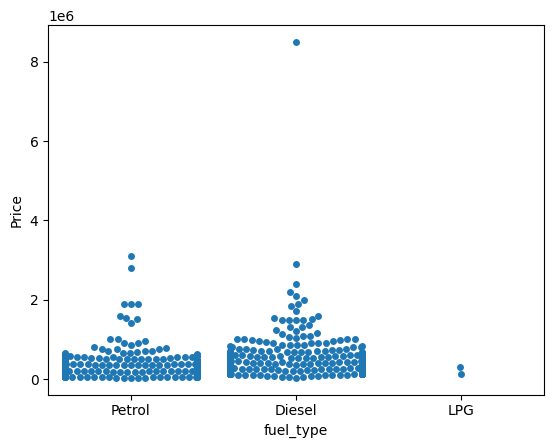

In [109]:
#price distribution of cars
sns.swarmplot(data=ds, x='fuel_type', y='Price')
plt.show()

In [110]:
price_mean = ds["Price"].mean()
print(price_mean)

400060.54442877293


In [111]:
#Outlier Remove
ds = ds[ds["Price"] < 5000000]

In [112]:
ds["Price"].mean()

np.float64(388619.947740113)

In [113]:
ds = ds[ds["Price"] > 50000]

In [114]:
len(ds)

693

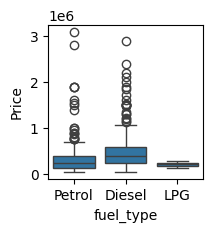

In [116]:
plt.figure(figsize=(2, 2))
sns.boxplot(data=ds, x='fuel_type', y='Price')
plt.show()

In [117]:
ds.reset_index(drop = True).to_csv("cleaned_data.csv")